### Requierments of linear regression

1. Linear Assumption — model assumes the relationship between variables is linear
2. No Noise — model assumes that the input and output variables are not noisy — so remove outliers if possible
3. No Collinearity — model will overfit when you have highly correlated input variables
4. Normal Distribution — the model will make more reliable predictions if your input and output variables are normally distributed. If that’s not the case, try using some transforms on your variables to make them more normal-looking
5. Rescaled Inputs — use scalers or normalizer to make more reliable predictions

[image.png](attachment:image.png)


In [1]:
 #Import packages and classes
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Getting the data
df=pd.read_csv('../input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print(df.describe())
print(df.info())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [4]:
#Checking the null values
df.total_bedrooms.isnull().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

In [5]:
#filling the navalue
df.total_bedrooms.fillna(df.total_bedrooms.median(),inplace=True)


In [6]:
#Checking the value of cateogrical variable
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#Creating dummy variable for Ocean_Proximity
df1=pd.get_dummies(data=df,columns=['ocean_proximity'],drop_first=True)
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [8]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.006158,-0.004322,-0.019667,0.000557
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006158,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


<AxesSubplot:>

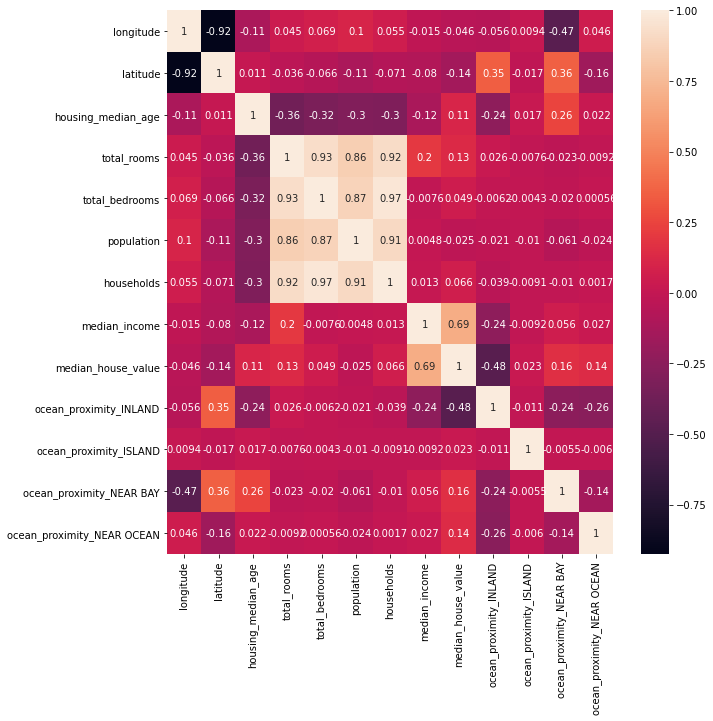

In [9]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix 
from matplotlib import pyplot as plt, style
#style.use('ggplot')
#scatter_matrix(df.iloc[:,2:11], figsize=(20, 10))
#plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

In [10]:
#assignment of x and y
x=df1[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']]
y=df1['median_house_value']


In [11]:
#splitting the data

from sklearn.model_selection import train_test_split

train_X,test_x,train_Y,test_y=train_test_split(x,y,random_state=0)
print(train_X.shape)
print(test_x.shape)

(15480, 10)
(5160, 10)


In [12]:
#Standerize the value
from sklearn.preprocessing import StandardScaler

#intialize
stdScaler=StandardScaler()

In [13]:
#Fittling the model for scaling
stdScaler.fit(train_X)

#Transform from matrix
x_train_std=stdScaler.transform(train_X)
x_test_std=stdScaler.transform(test_x)

In [14]:
#create estimator object
from sklearn.linear_model import LinearRegression 

#intialising the model
houseModel=LinearRegression()

In [15]:
#fitting the model
houseModel.fit(x_train_std,train_Y)

LinearRegression()

In [16]:
#Model score for training data
houseModel.score(x_train_std,train_Y)

0.6354449499685482

In [17]:
#Model score for test data
houseModel.score(x_test_std,test_y)

0.6281134275347441

In [18]:
#Checking the prediction counts for both train and test
houseModel.predict(x_test_std)

array([222412.50517809, 297444.27708788, 175033.9138156 , ...,
       219738.42520967, 293653.3737997 , 279578.39517834])